In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [249]:
com=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data",delimiter=',')

In [250]:
com.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [251]:
cols1=com.columns=['vendor name','Model Name','MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX','PRP','ERP']

In [252]:
com.shape
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [253]:
com['Model Name'].unique().shape
com['Model Name'].isna().value_counts()

False    208
Name: Model Name, dtype: int64

In [254]:
for col in cols:
    print(com[col].isna().value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    208
Name: CACH, dtype: int64
False    208
Name: CHMIN, dtype: int64
False    208
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


In [255]:
for col in cols:
    print((com[col]==0).value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    139
True      69
Name: CACH, dtype: int64
False    203
True       5
Name: CHMIN, dtype: int64
False    203
True       5
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


In [256]:
com.loc[com['CACH']==0].index

Int64Index([  9,  13,  14,  16,  17,  19,  20,  21,  22,  23,  25,  46,  49,
             50,  52,  56,  57,  58,  59,  60,  61,  65,  66,  67,  71,  72,
             75,  79,  82,  83,  84,  85,  96,  97,  98,  99, 101, 102, 103,
            104, 105, 106, 107, 110, 121, 122, 123, 124, 130, 136, 156, 157,
            158, 159, 160, 161, 162, 163, 169, 170, 172, 173, 199, 200, 201,
            202, 203, 205, 207],
           dtype='int64')

In [12]:
com=com.drop(['ERP'],axis=1)

In [13]:
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,amdahl,470v/7,29,8000,32000,32,8,32,269
1,amdahl,470v/7a,29,8000,32000,32,8,32,220
2,amdahl,470v/7b,29,8000,32000,32,8,32,172
3,amdahl,470v/7c,29,8000,16000,32,8,16,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318


In [257]:
for col in cols1:
    print(com[col].isnull().value_counts())

False    208
Name: vendor name, dtype: int64
False    208
Name: Model Name, dtype: int64
False    208
Name: MYCT, dtype: int64
False    208
Name: MMIN, dtype: int64
False    208
Name: MMAX, dtype: int64
False    208
Name: CACH, dtype: int64
False    208
Name: CHMIN, dtype: int64
False    208
Name: CHMAX, dtype: int64
False    208
Name: PRP, dtype: int64
False    208
Name: ERP, dtype: int64


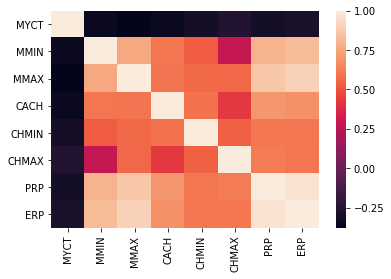

In [258]:
corr = com.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

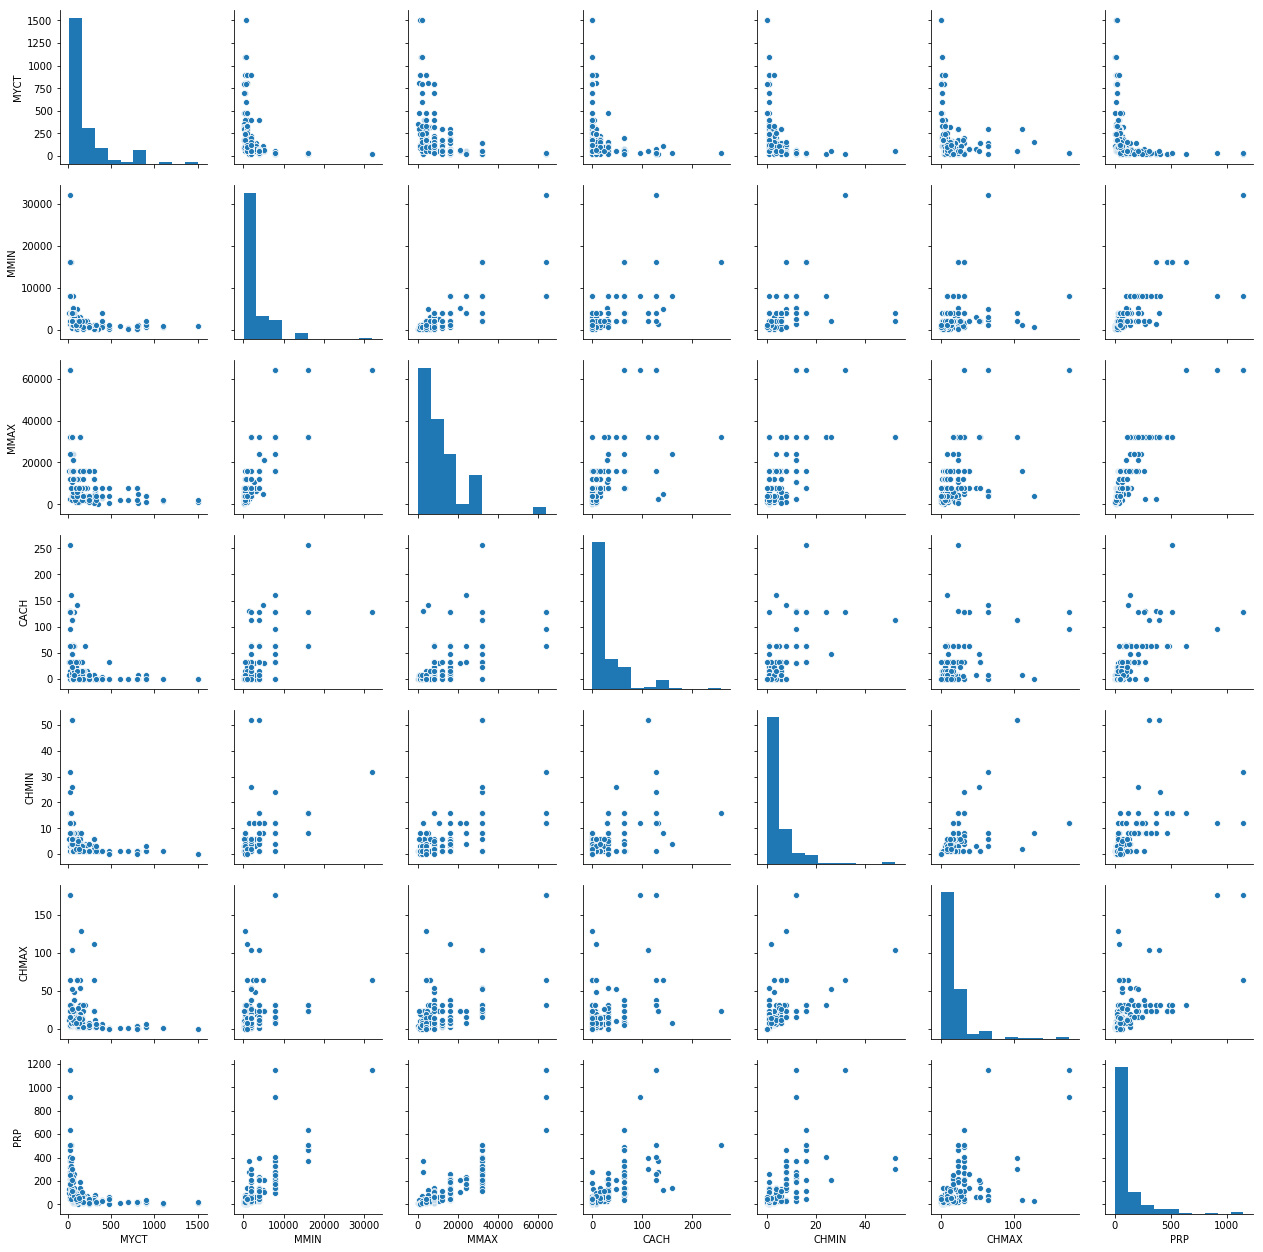

In [23]:
sns.pairplot(com)

In [24]:
com['pred vals']=None

In [25]:
com.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,pred vals
0,amdahl,470v/7,29,8000,32000,32,8,32,269,None
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,None
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,None
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,None
4,amdahl,470v/b,26,8000,32000,64,8,32,318,None


In [317]:
X=com[['MYCT','MMIN','MMAX','CACH','CHMIN','CHMAX']]
y=com['PRP']

In [363]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.215,random_state=0)

In [364]:
print(train_X.shape)
print(test_X.shape)

(163, 6)
(45, 6)


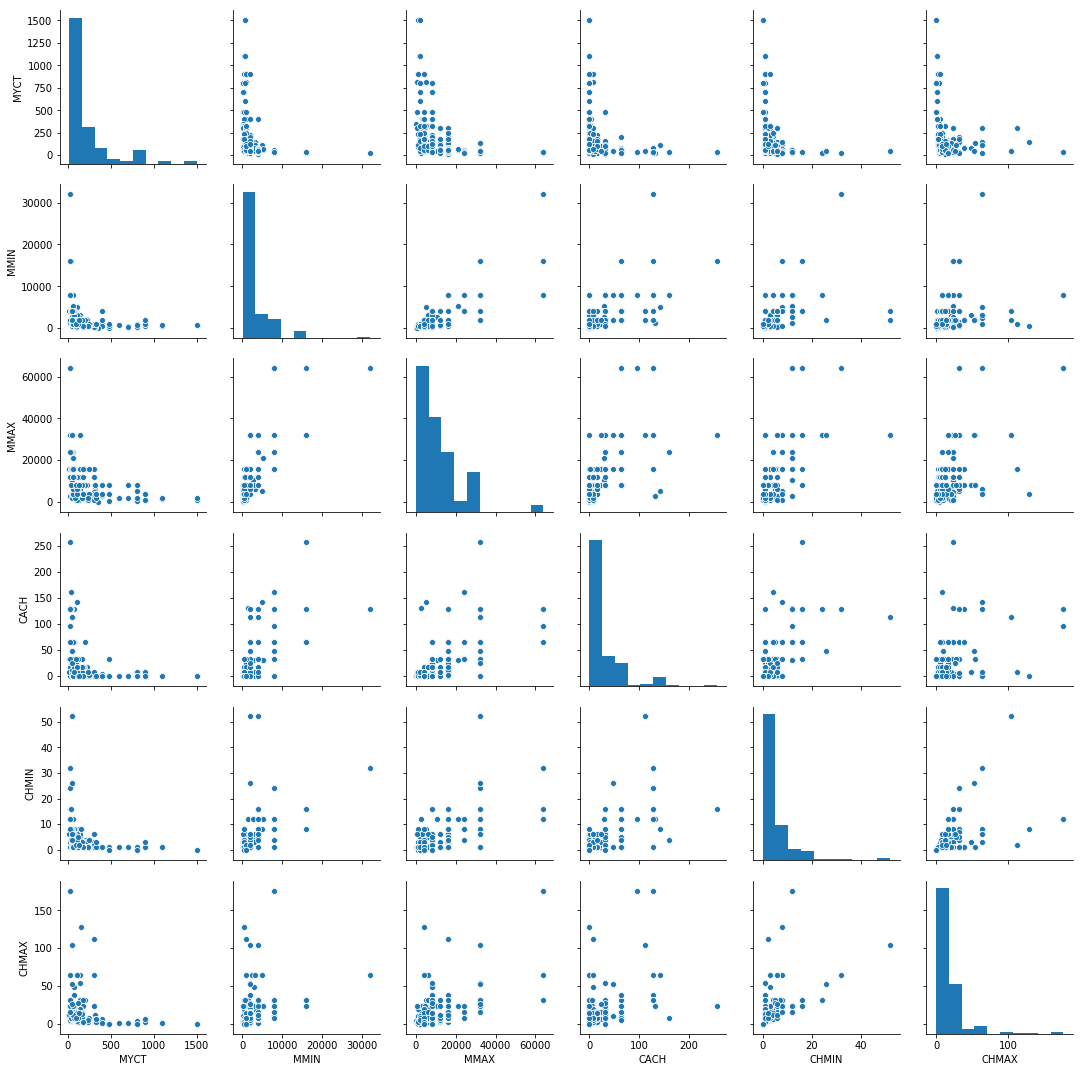

In [365]:
sns.pairplot(X)

In [366]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=50,min_samples_leaf=2,max_features='sqrt',min_impurity_decrease=0.02,oob_score=True,n_jobs=-1)
rf.fit(train_X,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.02, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=50, verbose=0, warm_start=False)

In [367]:
pred=rf.predict(test_X)

In [368]:
errors=abs(pred-test_y)

In [369]:
np.mean(errors)

22.347154686889

In [370]:
rf.score(test_X,test_y)

0.9121474054605394

In [371]:
mape=100*(errors/test_y)
accuracy=100-np.mean(mape)

In [372]:
accuracy

72.506772921658

In [92]:
print(rf.get_params()['max_depth'])

None


In [241]:
rf.obb_score_

AttributeError: 'RandomForestRegressor' object has no attribute 'obb_score_'

In [303]:
from sklearn.tree import DecisionTreeRegressor
dr=DecisionTreeRegressor(min_samples_leaf=2)
dr.fit(train_X,train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [304]:
dr.score(test_X,test_y)

0.8086322025086041

In [305]:
pred=dr.predict(test_X)
errors=abs(pred-test_y)
np.mean(errors)

41.26211001642036

In [264]:
erp=np.array(com['ERP'])
prp=np.array(com['PRP'])

In [282]:
e=abs(erp-prp)
np.mean(e)

24.442307692307693

In [328]:
mape=100*(e/prp)
accuracy=100-np.mean(mape)
accuracy

65.93343088984034

In [373]:
pred.shape

(45,)

In [374]:
test_X.shape

(45, 6)